## Installing Required Libraries

In [1]:
pip install numpy pandas matplotlib scikit-learn tensorflow torchvision pillow

Note: you may need to restart the kernel to use updated packages.
  Using cached numpy-2.0.2-cp311-cp311-win_amd64.whl.metadata (59 kB)
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Rolling back uninstall of numpy
  Moving to c:\users\bambp\anaconda3\lib\site-packages\numpy-1.24.3.dist-info\
   from C:\Users\bambp\anaconda3\Lib\site-packages\~umpy-1.24.3.dist-info
  Moving to c:\users\bambp\anaconda3\lib\site-packages\numpy\__config__.py
   from C:\Users\bambp\AppData\Local\Temp\pip-uninstall-502aot9r\__config__.py
  Moving to c:\users\bambp\anaconda3\lib\site-packages\numpy\__init__.cython-30.pxd
   from C:\Users\bambp\AppData\Local\Temp\pip-uninstall-502aot9r\__init__.cython-30.pxd
  Moving to c:\users\bambp\anaconda3\lib\site-packages\numpy\__init

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\bambp\\anaconda3\\Lib\\site-packages\\numpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Loading The Dataset & Displaying All Classes

In [2]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the dataset paths
data_dir = "C:\\Users\\bambp\\Desktop\\Plant Disease Detection And Fertilizer Suggestion\\Plant_Disease_Dataset" # Replace this with the full path to your dataset folder
train_dir = os.path.join(data_dir, "train")
valid_dir = os.path.join(data_dir, "valid")
test_dir = os.path.join(data_dir, "test")  # Used for final testing with specific images

# Define image transformations (resize, normalize)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224 for ResNet
    transforms.ToTensor(),         # Convert to Tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize for ResNet
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
valid_dataset = datasets.ImageFolder(valid_dir, transform=transform)

# DataLoader for batching
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

# Check class names and dataset sizes
print(f"Classes: {train_dataset.classes}")
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(valid_dataset)}")

Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___

## Loading Architecture, Architecture: RESNET18

In [3]:
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet18
from tqdm import tqdm  # For progress bars during training

# Load pre-trained ResNet
model = resnet18(pretrained=True)

# Freeze earlier layers for transfer learning
for param in model.parameters():
    param.requires_grad = False

# Replace the final fully connected layer
num_classes = len(train_dataset.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move model to CPU
device = torch.device("cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

# Print the model architecture
print(model)


C:\Users\bambp\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\bambp\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## Training & Validation With Plotting

In [4]:
import matplotlib.pyplot as plt

def train_model(model, train_loader, valid_loader, criterion, optimizer, epochs=10):
    train_losses, valid_losses = [], []
    train_accuracies, valid_accuracies = [], []
    best_accuracy = 0.0

    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        model.train()  # Set the model to training mode
        
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for images, labels in tqdm(train_loader):
            images, labels = images.to(device), labels.to(device)
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()

            # Training accuracy
            _, preds = torch.max(outputs, 1)
            correct_train += (preds == labels).sum().item()
            total_train += labels.size(0)
        
        # Calculate average training loss and accuracy
        train_loss = running_loss / len(train_loader)
        train_accuracy = correct_train / total_train * 100
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Validation phase
        model.eval()  # Set the model to evaluation mode
        valid_loss = 0.0
        correct_valid = 0
        total_valid = 0

        with torch.no_grad():
            for images, labels in tqdm(valid_loader):
                images, labels = images.to(device), labels.to(device)
                
                outputs = model(images)
                loss = criterion(outputs, labels)
                valid_loss += loss.item()

                # Validation accuracy
                _, preds = torch.max(outputs, 1)
                correct_valid += (preds == labels).sum().item()
                total_valid += labels.size(0)
        
        # Calculate average validation loss and accuracy
        valid_loss = valid_loss / len(valid_loader)
        valid_accuracy = correct_valid / total_valid * 100
        valid_losses.append(valid_loss)
        valid_accuracies.append(valid_accuracy)

        print(f"Train Loss: {train_loss:.4f}, Validation Loss: {valid_loss:.4f}")
        print(f"Train Accuracy: {train_accuracy:.2f}%, Validation Accuracy: {valid_accuracy:.2f}%")

        # Save the best model
        if valid_accuracy > best_accuracy:
            best_accuracy = valid_accuracy
            torch.save(model.state_dict(), "best_resnet_model.pth")
            print("Saved the best model so far!")

    print("Training complete.")

    # Plot the accuracy graph
    plt.figure(figsize=(10, 5))
    plt.plot(train_accuracies, label="Train Accuracy")
    plt.plot(valid_accuracies, label="Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.title("Training vs Validation Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

    return train_losses, valid_losses, train_accuracies, valid_accuracies

Epoch 1/1


100%|████████████████████████████████████████████████████████████████████████████████| 550/550 [09:16<00:00,  1.01s/it]


Train Loss: 0.4696, Validation Loss: 0.1952
Train Accuracy: 88.91%, Validation Accuracy: 94.24%
Saved the best model so far!
Training complete.


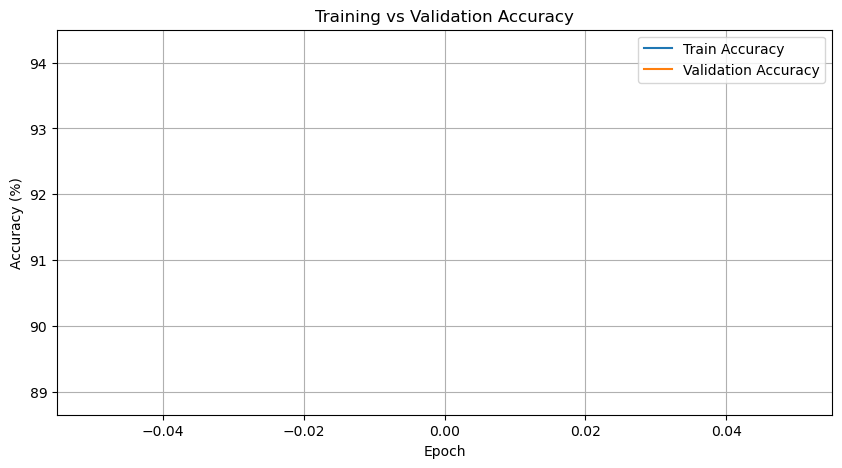

In [5]:
# Set number of epochs
epochs = 1

# Train the model and get results
train_losses, valid_losses, train_accuracies, valid_accuracies = train_model(
    model, train_loader, valid_loader, criterion, optimizer, epochs=epochs
)

## Map Disease Classes To Fertilizer Suggestions

In [6]:
fertilizer_suggestions = {
    "Apple___Apple_scab": "Apply fungicides containing captan or copper and ensure proper pruning.",
    "Apple___Black_rot": "Use fungicides containing thiophanate-methyl or myclobutanil.",
    "Apple___Cedar_apple_rust": "Spray sulfur-based fungicides and remove infected leaves.",
    "Apple___healthy": "Maintain a balanced fertilization schedule with nitrogen, phosphorus, and potassium.",
    "Blueberry___healthy": "Use ammonium-based fertilizers and maintain acidic soil conditions (pH 4.5-5.5).",
    "Cherry_(including_sour)___Powdery_mildew": "Apply sulfur-based or potassium bicarbonate fungicides.",
    "Cherry_(including_sour)___healthy": "Use compost or balanced fertilizers rich in potassium and nitrogen.",
    "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot": "Apply strobilurin fungicides and ensure crop rotation.",
    "Corn_(maize)___Common_rust_": "Use fungicides with propiconazole or pyraclostrobin.",
    "Corn_(maize)___Northern_Leaf_Blight": "Apply fungicides containing azoxystrobin or mancozeb.",
    "Corn_(maize)___healthy": "Fertilize with nitrogen-rich fertilizers during the growing season.",
    "Grape___Black_rot": "Use fungicides containing myclobutanil or mancozeb and prune infected vines.",
    "Grape___Esca_(Black_Measles)": "Apply fungicides during the early growing season and improve drainage.",
    "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)": "Use copper-based fungicides and avoid overhead irrigation.",
    "Grape___healthy": "Use balanced fertilizers with potassium, phosphorus, and magnesium.",
    "Orange___Haunglongbing_(Citrus_greening)": "Apply micronutrient sprays and systemic insecticides for psyllid control.",
    "Peach___Bacterial_spot": "Use copper-based bactericides and avoid overhead irrigation.",
    "Peach___healthy": "Fertilize with nitrogen during the early growing season.",
    "Pepper,_bell___Bacterial_spot": "Apply copper-based fungicides and avoid waterlogged conditions.",
    "Pepper,_bell___healthy": "Use balanced fertilizers rich in nitrogen and potassium.",
    "Potato___Early_blight": "Apply fungicides containing chlorothalonil or mancozeb.",
    "Potato___Late_blight": "Use fungicides with fluazinam or mancozeb and ensure good airflow.",
    "Potato___healthy": "Fertilize with balanced NPK fertilizers during tuber development.",
    "Raspberry___healthy": "Use compost or potassium-rich fertilizers to encourage healthy growth.",
    "Soybean___healthy": "Inoculate seeds with rhizobia bacteria and apply phosphorus-rich fertilizers.",
    "Squash___Powdery_mildew": "Spray sulfur-based fungicides or potassium bicarbonate solutions.",
    "Strawberry___Leaf_scorch": "Apply fungicides containing thiophanate-methyl or mancozeb.",
    "Strawberry___healthy": "Use balanced fertilizers with potassium and magnesium for fruit development.",
    "Tomato___Bacterial_spot": "Spray copper-based bactericides and remove infected plants.",
    "Tomato___Early_blight": "Use fungicides containing chlorothalonil or copper-based sprays.",
    "Tomato___Late_blight": "Apply fungicides with mancozeb or chlorothalonil.",
    "Tomato___Leaf_Mold": "Use sulfur-based fungicides and improve ventilation.",
    "Tomato___Septoria_leaf_spot": "Spray fungicides containing mancozeb or copper oxychloride.",
    "Tomato___Spider_mites Two-spotted_spider_mite": "Use miticides or neem oil for control.",
    "Tomato___Target_Spot": "Apply fungicides with azoxystrobin or mancozeb.",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus": "Control whiteflies with systemic insecticides.",
    "Tomato___Tomato_mosaic_virus": "Remove infected plants and disinfect tools.",
    "Tomato___healthy": "Use a balanced fertilizer with calcium and potassium to support growth."
}


## Test The Model

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

def test_image_with_display(model, image_path, classes, transform, suggestions):
    """
    Predicts the disease from an image path, provides fertilizer suggestions, 
    and displays the image being tested.
    
    Args:
        model: Trained PyTorch model.
        image_path: Path to the input image.
        classes: List of class names.
        transform: Preprocessing transform for the input image.
        suggestions: Dictionary with class names as keys and fertilizer suggestions as values.
    
    Returns:
        Predicted class and corresponding fertilizer suggestion.
    """
    # Load and preprocess the image
    image = Image.open(image_path).convert("RGB")
    
    # Display the image
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.title("Image Being Tested")
    plt.axis("off")
    plt.show()
    
    # Preprocess the image
    processed_image = transform(image).unsqueeze(0)  # Add batch dimension

    # Set the model to evaluation mode
    model.eval()

    # Predict the class
    with torch.no_grad():
        outputs = model(processed_image.to(device))
        _, predicted = torch.max(outputs, 1)
        predicted_class = classes[predicted.item()]

    # Check if the class is healthy
    if "healthy" in predicted_class.lower():
        suggestion = "Healthy: No fertilizer needed right now."
    else:
        suggestion = suggestions.get(predicted_class, "No suggestion available.")

    return predicted_class, suggestion


## Change Image Path Accordingly For Testing

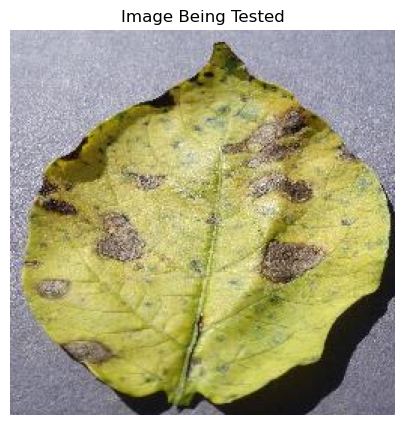

Disease Detected: Potato___Early_blight
Suggestion: Apply fungicides containing chlorothalonil or mancozeb.


In [9]:
# Correct the file path
test_image_path = r"C:\Users\bambp\Desktop\Plant Disease Detection And Fertilizer Suggestion\Plant_Disease_Dataset\test\test\PotatoEarlyBlight4.JPG"

# Predict the disease, get the fertilizer suggestion, and display the image
predicted_class, suggestion = test_image_with_display(
    model, test_image_path, train_dataset.classes, transform, fertilizer_suggestions
)

print(f"Disease Detected: {predicted_class}")
print(f"Suggestion: {suggestion}")


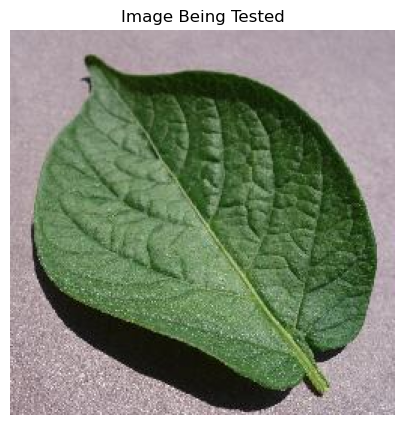

Disease Detected: Potato___healthy
Suggestion: Healthy: No fertilizer needed right now.


In [10]:
# Correct the file path
test_image_path = r"C:\Users\bambp\Desktop\Plant Disease Detection And Fertilizer Suggestion\Plant_Disease_Dataset\test\test\PotatoHealthy1.JPG"

# Predict the disease, get the fertilizer suggestion, and display the image
predicted_class, suggestion = test_image_with_display(
    model, test_image_path, train_dataset.classes, transform, fertilizer_suggestions
)

print(f"Disease Detected: {predicted_class}")
print(f"Suggestion: {suggestion}")
